[src](https://github.com/jmschrei/pomegranate/blob/master/tutorials/Tutorial_1_Distributions.ipynb)

In [1]:
from pomegranate import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


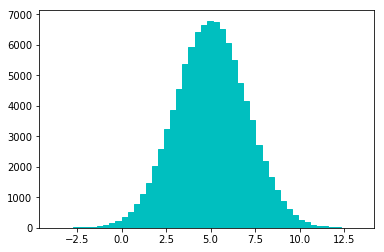

In [2]:
d = NormalDistribution( 5, 2 )
d.plot( n=100000, edgecolor='c', color='c', bins=50 )

In [3]:
print d.log_probability( 1 )
print d.log_probability( 5 )
print d.log_probability( 9 )

-3.61208571376
-1.61208571376
-3.61208571376


[8.997891580657793, 0.40074541401247943]


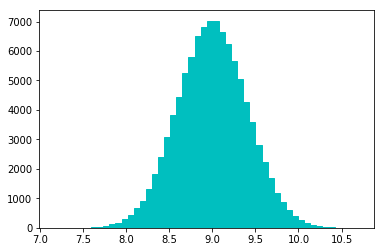

In [5]:
data = np.random.randn(10000) * 0.4 + 9
d.fit( data )
d.plot( n=100000, edgecolor='c', color='c', bins=50 )
print d.parameters

In [6]:
d = NormalDistribution( 10, 1 )
e = NormalDistribution( 200, 1 )

d.fit( data, inertia=0.0 ) # The default setting
e.fit( data, inertia=0.5 )

print "d -- mu: {} sigma {}".format( *d.parameters )
print "e -- mu: {} sigma {}".format( *e.parameters )

d -- mu: 8.99789158066 sigma 0.400745414012
e -- mu: 104.49894579 sigma 0.700372707006


In [9]:
d = NormalDistribution( 105, 12 )

for i in range(10):
    d.summarize( data[i::10] )

d.from_summaries()
print "d -- mu: {} sigma {}".format( *d.parameters )

d -- mu: 8.99789158066 sigma 0.400745414013


(array([    4.,    10.,    21.,    56.,   113.,   186.,   324.,   499.,
          676.,   883.,   965.,  1093.,  1165.,   989.,   917.,   767.,
          539.,   334.,   231.,   102.,    66.,    35.,    19.,     3.,
            3.]),
 array([  63.22354169,   66.66639517,   70.10924865,   73.55210212,
          76.9949556 ,   80.43780907,   83.88066255,   87.32351603,
          90.7663695 ,   94.20922298,   97.65207645,  101.09492993,
         104.53778341,  107.98063688,  111.42349036,  114.86634383,
         118.30919731,  121.75205078,  125.19490426,  128.63775774,
         132.08061121,  135.52346469,  138.96631816,  142.40917164,
         145.85202512,  149.29487859]),
 <a list of 25 Patch objects>)

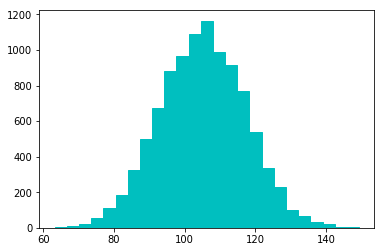

In [10]:
d = NormalDistribution( 105, 12 )
samples = [ d.sample() for i in range(10000) ]
plt.hist( samples, edgecolor='c', color='c', bins=25 )

In [11]:
d = DiscreteDistribution({'A': 0.1, 'C': 0.25, 'G': 0.50, 'T': 0.15})
print d.log_probability( 'A' )
print d.log_probability( 'G' )
print d.log_probability( '????' )

-2.30258509299
-0.69314718056
-inf


In [12]:
items = list('ACGATACACTGAATGACAGCAGTCACTGACAGTAGTACGAGTAGTAGCAGAGAGTAATAAAGAATTAATATATGACACTACGAAAAAAATGCATCG')
d.fit( items )

for char in 'ACGT':
    print "logp({}) = {}".format( char, d.log_probability( char ) )

print d.parameters

logp(A) = -0.826678573184
logp(C) = -1.85629799037
logp(G) = -1.56861591791
logp(T) = -1.6199092123
[{'A': 0.4375, 'C': 0.15625, 'T': 0.19791666666666666, 'G': 0.20833333333333334}]


In [13]:
d

{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "A" :0.4375,
            "C" :0.15625,
            "T" :0.19791666666666666,
            "G" :0.20833333333333334
        }
    ],
    "name" :"DiscreteDistribution"
}

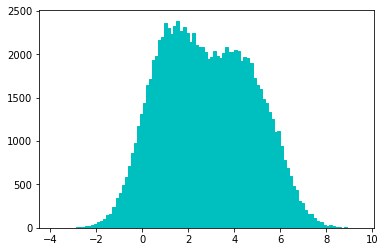

In [14]:
## non parametric
d = GaussianKernelDensity( [0.5, 1.2, 4.2, 1.9, 5.4, 3.4], bandwidth=1 )
d.plot( n=100000, edgecolor='c', color='c', bins=100 )


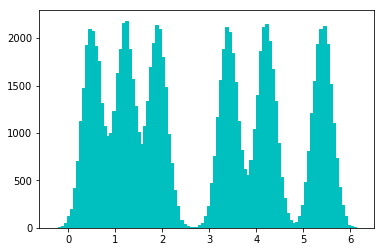

In [15]:
d = GaussianKernelDensity( [0.5, 1.2, 4.2, 1.9, 5.4, 3.4], bandwidth=0.2 )
d.plot( n=100000, edgecolor='c', color='c', bins=100 )

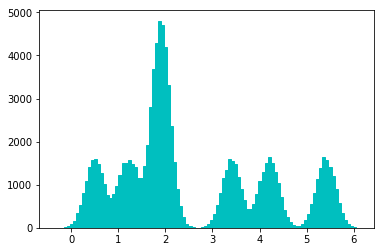

In [16]:
d = GaussianKernelDensity( [0.5, 1.2, 4.2, 1.9, 5.4, 3.4], weights=[1, 1, 1, 3, 1, 1], bandwidth=0.2 )
d.plot( n=100000, edgecolor='c', color='c', bins=100 )

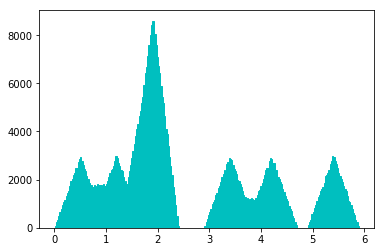

In [17]:
d = TriangleKernelDensity( [0.5, 1.2, 4.2, 1.9, 5.4, 3.4], weights=[1, 1, 1, 3, 1, 1], bandwidth=0.5 )
d.plot( n=500000, edgecolor='c', color='c', bins=250 )

In [18]:
d = IndependentComponentsDistribution([ NormalDistribution(10, 1), ExponentialDistribution(0.5) ])
print d.log_probability( (11, 3) )

-3.61208571376


In [19]:
d = MultivariateGaussianDistribution( np.arange(5) * 5, np.eye(5) )
print d.sample()

[ -0.68162749   4.2263806   10.35224745  15.20016092  19.57271049]


In [21]:
data = np.random.randn(1000, 5) + np.arange(5) * 8

d.fit(data)
print d.parameters
print d

[[0.010971483603517683, 8.000669087700379, 15.967109510257739, 23.980870169195843, 32.01944776967262], [[1.0287891252184995, 0.05135454622184082, 0.0597130453424702, 0.01578817761564926, -0.08070708974129616], [0.05135454622184082, 0.9839886543226894, -0.023258251013394328, -0.02609811461737263, -0.015533709579671267], [0.05971304534247017, -0.023258251013394328, 0.9874276184084593, 0.034456031542737034, 0.06121479773893952], [0.01578817761564926, -0.02609811461737263, 0.034456031542737034, 0.9852507668029284, 0.01279495774616953], [-0.0807070897412965, -0.015533709579671267, 0.06121479773893952, 0.01279495774616953, 0.9829451551014791]]]
{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        [
            0.010971483603517683,
            8.000669087700379,
            15.967109510257739,
            23.980870169195843,
            32.01944776967262
        ],
        [
            [
                1.0287891252184995,
                0.05135454622184082,
    